### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsaplots

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
sunspots = pd.read_csv('data/sunspots.csv')
air = pd.read_csv('data/AirPassengers.csv')

In [43]:
sunspots['date'] = sunspots['YEAR'].astype(str)
air['date'] = air['Month'] + '-01'

In [55]:
air

,Month,#Passengers,date
date,,,
1949-01-01,1949-01,112,1949-01-01
1949-02-01,1949-02,118,1949-02-01
1949-03-01,1949-03,132,1949-03-01
1949-04-01,1949-04,129,1949-04-01
1949-05-01,1949-05,121,1949-05-01
...,...,...,...
1960-08-01,1960-08,606,1960-08-01
1960-09-01,1960-09,508,1960-09-01
1960-10-01,1960-10,461,1960-10-01


In [54]:
sunspots['dt'] = sunspots['date'].str[:-2] + '-01-01'
sunspots.set_index(pd.to_datetime(sunspots['dt']), inplace=True)
air.set_index(pd.to_datetime(air['date']), inplace=True)

<Axes: xlabel='date'>

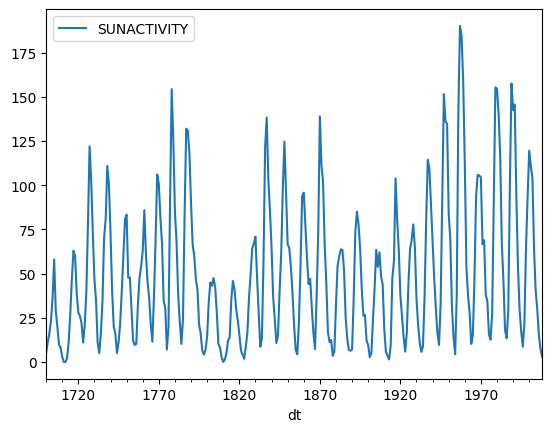

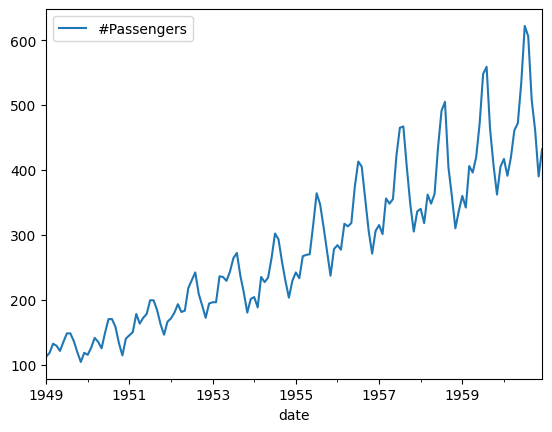

In [59]:
sunspots.drop(columns='YEAR').plot()
air.drop(columns='Month').plot()

In [76]:
sunspots['SUNACTIVITY'].isna().sum()

0

In [84]:
airDecompA = sm.tsa.seasonal_decompose(air['#Passengers'], model='additive')
airDecompM = sm.tsa.seasonal_decompose(air['#Passengers'], model='multiplicative')

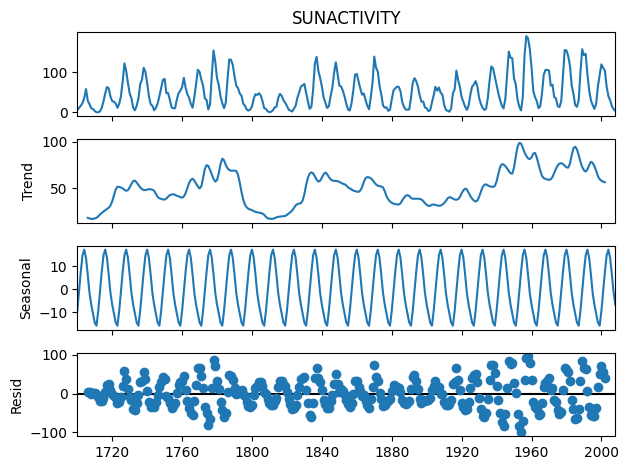

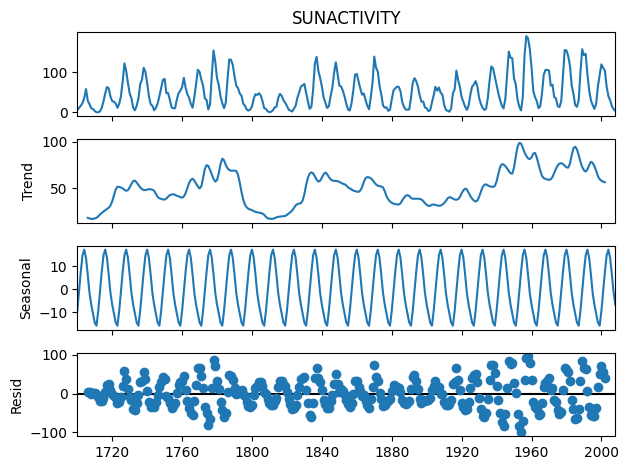

In [89]:
sunspotsDecompA = sm.tsa.seasonal_decompose(sunspots['SUNACTIVITY'], model='additive', period=12)
sunspotsDecompA.plot()

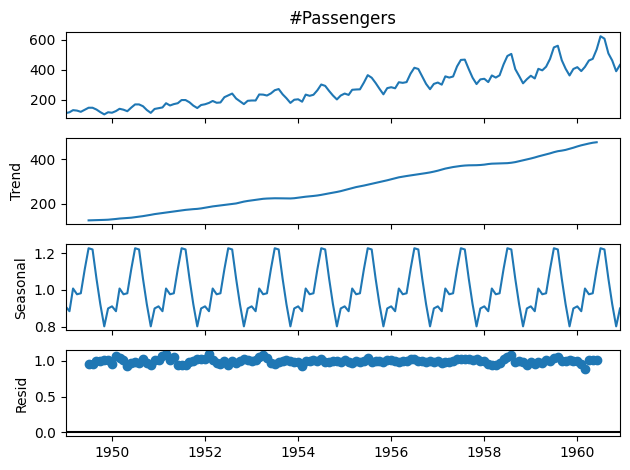

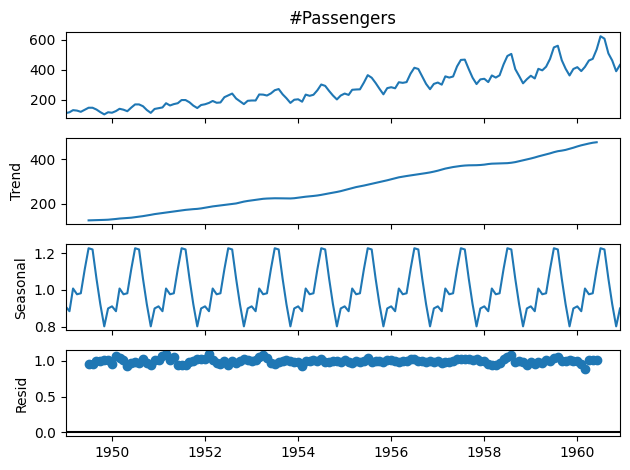

In [61]:
airDecompM.plot()

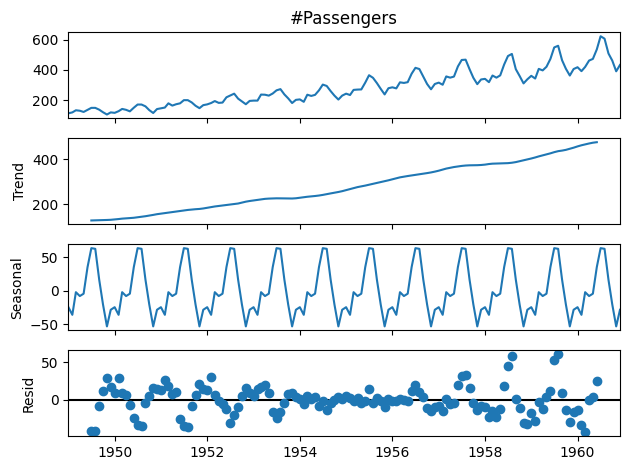

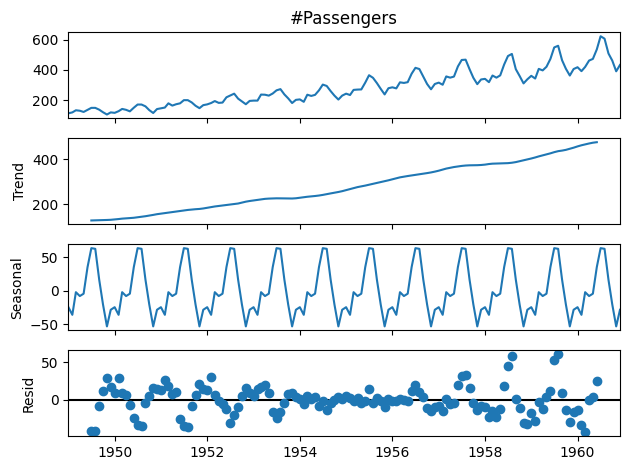

In [62]:
airDecompA.plot()